## Homework, section 2

In [159]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv')
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


### Preparing the dataset 

First, normalize the name of the columns

In [160]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


### EDA

<Axes: xlabel='final_price', ylabel='Count'>

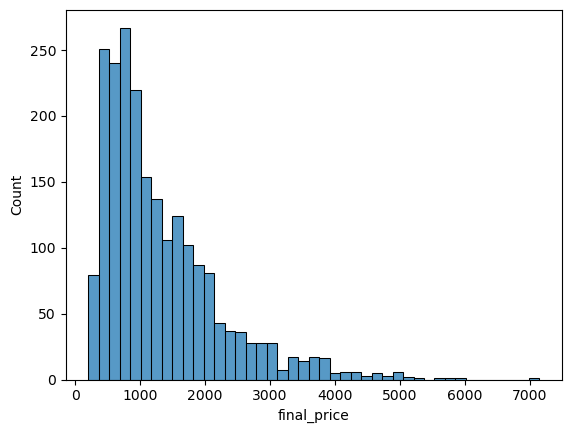

In [161]:
sns.histplot(df.final_price)

<Axes: xlabel='final_price', ylabel='Count'>

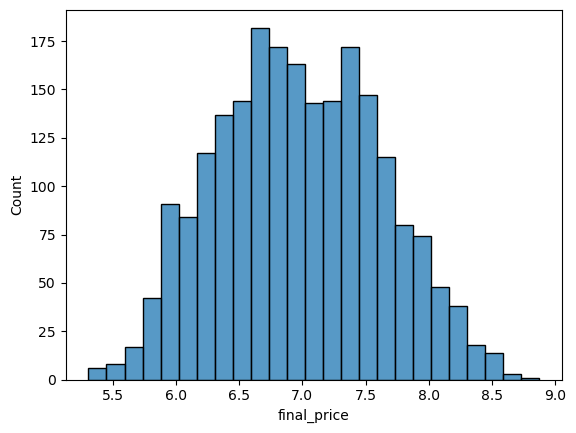

In [162]:
sns.histplot(np.log1p(df.final_price))

In [163]:
df.screen.unique(), df.ram.unique(), df.storage.unique()



(array([15.6 , 17.3 , 14.  , 16.1 , 13.3 , 16.  , 13.6 , 17.  , 15.3 ,
        14.5 , 13.4 , 14.2 , 18.  , 14.1 , 12.4 , 13.5 , 16.2 , 15.  ,
        11.6 , 13.  , 10.5 , 14.4 ,   nan, 12.3 , 15.4 , 12.5 , 10.1 ,
        10.95, 12.  , 13.9 ]),
 array([  8,  16,  32,  12,   4,  64, 128,   6,  40]),
 array([ 512,  256, 1000,   64,  128,   32,    0, 2000,  500, 4000, 3000,
         240]))

In [164]:
features = ['ram', 'storage', 'screen', 'final_price']
df_select = df[features]
df_select

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


Screeen is a continuous variable, the other two are categorical. 

### Question 1

There's one column with missing values. What is it?

In [165]:
df_select.isna().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

The answer is 'screen'

### Question 2

What's the median (50% percentile) for variable `'ram'`?

In [166]:
df_select['ram'].median()

16.0


### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [167]:
n = len(df)

n_test = int(n*0.2)
n_val = int(n*0.2)
n_train = n - n_test - n_val
n

2160

In [168]:
n_val, n_test, n_train

(432, 432, 1296)

In [169]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
idx

array([2079,  668, 2073, ..., 1130, 1294,  860], shape=(2160,))

In [170]:
df_train = df_select.iloc[idx[:n_train]]
df_val = df_select.iloc[idx[n_train:n_train+n_val]]
df_test = df_select.iloc[idx[n_train+n_val:]]

In [171]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29
1,4,64,14.1,201.05
2,32,1000,14.0,997.74
3,16,512,13.3,1016.00
4,32,1000,16.0,2739.00
...,...,...,...,...
1291,8,256,14.0,549.00
1292,32,1000,16.0,1999.00
1293,16,512,15.6,1059.00
1294,16,512,14.0,1671.00


In [172]:
#y_train = np.log1p(df_train.final_price.values)
#y_val = np.log1p(df_val.final_price.values)
#y_test = np.log1p(df_test.final_price.values)

y_train = (df_train.final_price.values)
y_val = (df_val.final_price.values)
y_test = (df_test.final_price.values)

In [173]:
df_train

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29
1,4,64,14.1,201.05
2,32,1000,14.0,997.74
3,16,512,13.3,1016.00
4,32,1000,16.0,2739.00
...,...,...,...,...
1291,8,256,14.0,549.00
1292,32,1000,16.0,1999.00
1293,16,512,15.6,1059.00
1294,16,512,14.0,1671.00


In [174]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [175]:
len(df_train)

1296


### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

In [176]:
df_train_0 = df_train.fillna(0)
df_val_0 = df_val.fillna(0)
df_test_0 = df_test.fillna(0)

screen_mean = df_train['screen'].mean()

df_train_m = df_train.fillna(screen_mean)
df_val_m = df_val.fillna(screen_mean)
df_test_m = df_test.fillna(screen_mean)

In [177]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [178]:
w0_0, w_0 = train_linear_regression(df_train_0, y_train)

w0_m, w_m = train_linear_regression(df_train_m, y_train)


y_pred_0 = w0_0 + df_val_0.dot(w_0)
y_pred_m = w0_m + df_val_m.dot(w_m)

<Axes: ylabel='Count'>

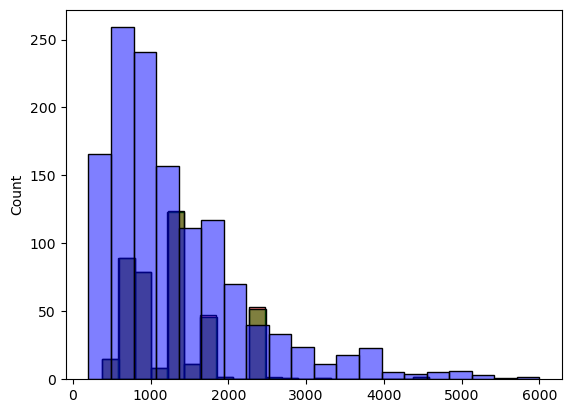

In [179]:
sns.histplot(y_pred_0, color='red', alpha=0.5, bins=20)
sns.histplot(y_pred_m, color='green', alpha=0.5, bins=20)
sns.histplot(y_train, color='blue', alpha=0.5, bins=20)


In [180]:
def rmse(y_pred, y_target):
    return np.sqrt(((y_pred - y_target) ** 2).mean())

In [181]:
rmse_0 = rmse(y_pred_0, y_val)
rmse_m = rmse(y_pred_m, y_val)

print(rmse_0, rmse_m)

597.3635593619621 600.2650313748422


In [109]:
list(df_train_0['ram'].value_counts().head(6))

[552, 493, 185, 38, 19, 5]

In [ ]:
## TRY 1 HOT ENCODING THE CATEGORICAL VALUES
## CATEGORICALS: RAM AND STORAGE

def one_hot_encode(df, columns, k=6):
    # in input mi viene dato il df e le colonne su cui fare 1HE, k è il numero di elementi da prendere
    # devo tirare fuori in output un nuovo df con le colonne encoded
    # 

    df = df.copy()

    categorical = {}
    # dict that contains as key the name of the column and as value a list of the six more 
    for c in columns:
        categorical[c] = list(df[c].value_counts().nlargest(k).index)
y_train = (df_train.final_price.values)
y_val = (df_val.final_price.values)
y_test = (df_test.final_price.values)
    for col in columns:
        for item in categorical[col]:
            df[f'{col}_{item}'] = (df[col] == item).astype(int)
        del df[f'{col}']
    

    return df

        
one_hot_encode(df_train_0, ['ram', 'storage'])    





,screen,ram_16,ram_8,ram_32,ram_4,ram_64,ram_12,storage_512,storage_1000,storage_256,storage_128,storage_2000,storage_500
0,15.6,0,0,1,0,0,0,0,1,0,0,0,0
1,14.1,0,0,0,1,0,0,0,0,0,0,0,0
2,14.0,0,0,1,0,0,0,0,1,0,0,0,0
3,13.3,1,0,0,0,0,0,1,0,0,0,0,0
4,16.0,0,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,14.0,0,1,0,0,0,0,0,0,1,0,0,0
1292,16.0,0,0,1,0,0,0,0,1,0,0,0,0
1293,15.6,1,0,0,0,0,0,1,0,0,0,0,0
1294,14.0,1,0,0,0,0,0,1,0,0,0,0,0


,screen,ram_16,ram_8,ram_32,ram_4,ram_64,ram_12,storage_512,storage_1000,storage_256,storage_128,storage_2000,storage_500
0,15.6,0,0,1,0,0,0,0,1,0,0,0,0
1,14.1,0,0,0,1,0,0,0,0,0,0,0,0
2,14.0,0,0,1,0,0,0,0,1,0,0,0,0
3,13.3,1,0,0,0,0,0,1,0,0,0,0,0
4,16.0,0,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,14.0,0,1,0,0,0,0,0,0,1,0,0,0
1292,16.0,0,0,1,0,0,0,0,1,0,0,0,0
1293,15.6,1,0,0,0,0,0,1,0,0,0,0,0
1294,14.0,1,0,0,0,0,0,1,0,0,0,0,0


In [137]:
def rmse(y_pred, y_target):
    return np.sqrt(((y_pred - y_target) ** 2).mean())

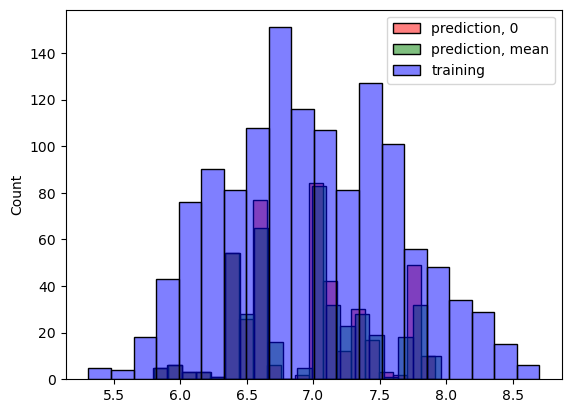

In [146]:
# training the model and validating it

X_train_0 = one_hot_encode(df_train_0, ['ram', 'storage']).values
X_train_m = one_hot_encode(df_train_m, ['ram', 'storage']).values

X_val_0 = one_hot_encode(df_val_0, ['ram', 'storage'])
X_val_m = one_hot_encode(df_val_m, ['ram', 'storage'])

X_test_0 = one_hot_encode(df_test_0, ['ram', 'storage'])
X_test_m = one_hot_encode(df_test_m, ['ram', 'storage'])


w0_0, w_0 = train_linear_regression(X_train_0, y_train)

w0_m, w_m = train_linear_regression(X_train_m, y_train)


y_pred_0 = w0_0 + X_val_0.dot(w_0)
y_pred_m = w0_m + X_val_m.dot(w_m)

ax = sns.histplot(y_pred_0, color='red', alpha=0.5, bins=20, label='prediction, 0')
sns.histplot(y_pred_m, color='green', alpha=0.5, bins=20, label='prediction, mean')
sns.histplot(y_train, color='blue', alpha=0.5, bins=20, label='training')
ax.legend()


In [147]:
rmse_0 = rmse(y_pred_0, y_val)
rmse_m = rmse(y_pred_m, y_val)

print(rmse_0, rmse_m)

0.45355159210582097 0.45887280913066286


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

In [187]:
reg = [0, 0.01, 0.1, 1, 5, 10, 100]

def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX +r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]


for r in reg:
    w0, w = train_linear_regression_reg(df_train_0, y_train, r=r)
    y_pred = w0 + df_val_0.dot(w)
    score = rmse(y_pred, y_val)

    print (f"{r}\t{score:.2f}\t{w0:.2f}")


0	597.36	676.90
0.01	597.36	676.27
0.1	597.35	670.73
1	597.21	619.90
5	597.01	463.78
10	597.06	352.80
100	597.90	66.92



### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

In [209]:
seeds = np.arange(10)

errors = []

for s in seeds: 
    n = len(df)

    n_test = int(n*0.2)
    n_val = int(n*0.2)
    n_train = n - n_test - n_val

    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)      

    features = ['ram', 'storage', 'screen', 'final_price']
    df_select = df[features]    

    df_train = df_select.iloc[idx[:n_train]]
    df_val = df_select.iloc[idx[n_train:n_train+n_val]]
    df_test = df_select.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    df_train_0 = df_train.fillna(0)
    df_val_0 = df_val.fillna(0)
    df_test_0 = df_test.fillna(0)

    y_train = (df_train.final_price.values)
    y_val = (df_val.final_price.values)
    y_test = (df_test.final_price.values)

    del df_train_0['final_price']
    del df_val_0['final_price']
    del df_test_0['final_price']

    w0_0, w_0 = train_linear_regression(df_train_0, y_train)
    y_pred_0 = w0_0 + df_val_0.dot(w_0)

    errors.append([s, rmse(y_pred_0, y_val)])

errors = np.array(errors)

np.std(errors[:,1])

        
    

    

np.float64(29.176491258291968)

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

In [211]:
n = len(df)

n_test = int(n*0.2)
n_train = n - n_test

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)      

features = ['ram', 'storage', 'screen', 'final_price']
df_select = df[features]    

df_train = df_select.iloc[idx[:n_train]]
df_test = df_select.iloc[idx[n_train:]]

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train_0 = df_train.fillna(0)
df_test_0 = df_test.fillna(0)

y_train = (df_train.final_price.values)
y_test = (df_test.final_price.values)

del df_train_0['final_price']
del df_test_0['final_price']

w0_0, w_0 = train_linear_regression(df_train_0, y_train)
y_pred_0 = w0_0 + df_test_0.dot(w_0)

rmse(y_pred_0, y_test)

np.float64(608.6102791248057)